***
# Project Milestone
***
2023, April 5th <br>
*COMP5360 Introduction to Data Science, Spring 2023*

#### Project Title: Incendio

>Hannah Van Hollebeke	vanhollebeke.hannah@gmail.com          u0697848 <br>
>Jenine Rogel           	u0468294@umail.utah.edu	               u0468294 <br>
>Isabelle Cook	        u1316961@utah.edu	                   u1316961 <br>

**Github Repository:**

https://github.com/Bonampak1/Incendio

## Project Description
***
In 2020, multiple large forest fires ravaged the western coast of the United States. The smoke impacted large areas in west and turned the sky gray. A study conducted by Li et al., showed that the fires adversely affected the pollutant PM2.5, which is one of the more harmful air pollutants produced by wildfire smoke, and found that "the West Coast wildfires contributed to 23% of surface PM2.5 pollution nationwide". Apart from being unpleasant, air pollutants negatively impact public health. One study by Anenberg et al. approximated that 4-9% of asthma emergency room visits globally in 2015 could be attributed to the air pollutant PM2.5. The figure below depicts the health risk based on the air quality index. Wildfires are one of the contributors to air pollutants, it is therefore important to study their relationship to each other. The primary objective of our project is to use the forest fire data as a way to predict air quality in the western United States as it relates to public health. We aim to answer the following questions:
- Do forest fires significantly correlate to different measures of air quality? 
- Are certain areas of the western US more prone to wildfires? Are the same areas most affected by poor air quality?
- What temporal trends have occurred over the past two decades? Can we use these to predict the impact of pollutants in the future?

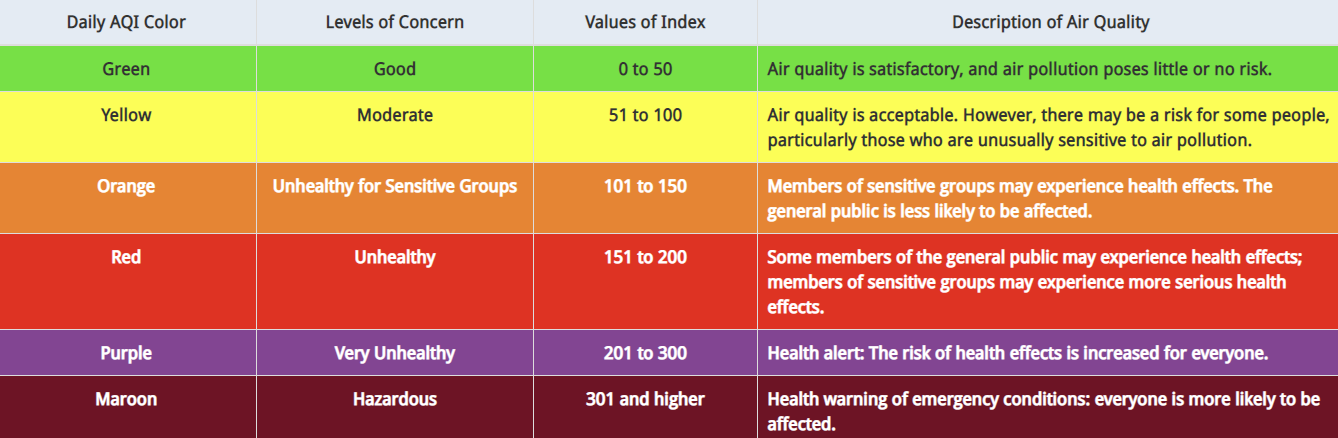
https://www.airnow.gov/aqi/aqi-basics/

By answering these questions, we expect to identify the ways that wildfires are connected to the air quality and showcase a few examples of how these correlations can be utilized. Moreover, understanding these research objectives can help policy makers and healthcare providers make faster and more informed decisions regarding public health. Furthermore, with the results of our research, wildfire hotspots could be identified, and fire safety measures could be improved in those areas. Lastly, air quality predictions could be improved with the knowledge of how air quality is affected by wildfires.

## Ethical Considerations
***
The following groups have been identified as stakeholders with whom the project results may impact. Stakeholders of high importance are those that are directly affected by the results of the project, such as homeowners and insurance providers in the affected area. The different committees, agencies, and government officials have median importance because they would be affected indirectly through related policies. However, they have a high influence on all other groups. Finally, the project members are stakeholders with low importance because they are only doing their job to share their findings.
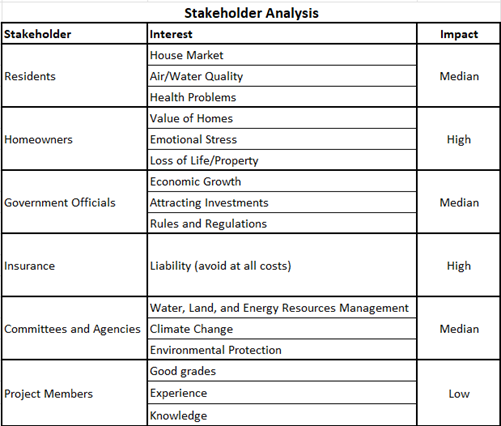

## Data Description
***
#### Fire Data
NASA provides satellite imaging data for forest fires which can be observed nearly in real-time. NASA maintains a data archive for the past 20 years. General information can be found here: https://www.earthdata.nasa.gov/learn/toolkits/disasters-toolkit/wildfires-toolkit). 

Data from two imaging instruments are available per country and year. Our analysis will use data from the United States over a time interval of 20 years. The appropriate CSV files will be downloaded directly from the webpage: https://firms.modaps.eosdis.nasa.gov/active_fire/.

The file contains geographical coordinates, date and time of imaging, brightness and energy measurements, and as well as some data source and quality attributes. 

In [1]:
# View a sample csv from MODIS instrument for the US in 2021
import pandas as pd
file = 'example_fire_data.csv'
sample_fire = pd.read_csv(file)
sample_fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.4007,-155.2798,383.0,1.1,1.1,2021-01-01,830,Terra,MODIS,100,6.03,286.5,203.4,N,1
1,19.3990,-155.2905,328.5,1.1,1.1,2021-01-01,830,Terra,MODIS,100,6.03,274.2,33.8,N,1
2,19.4085,-155.2921,375.9,1.1,1.1,2021-01-01,830,Terra,MODIS,100,6.03,278.4,168.9,N,1
3,19.4118,-155.2708,356.7,1.1,1.1,2021-01-01,830,Terra,MODIS,100,6.03,274.6,96.5,N,1
4,19.4101,-155.2816,464.1,1.1,1.1,2021-01-01,830,Terra,MODIS,100,6.03,304.8,1111.7,N,1


#### Air Quality Data
The environmental Protection Agency (EPA) provides data on air quality in regard to various pollutant types. Daily data is available for direct download (https://www.epa.gov/outdoor-air-quality-data/download-daily-data). However, it requires selection of a specific pollutant, state, and year for a single csv file. This may be tedious with the amount of geographical data (~13 US states), multiple pollutants, and 20 years of data. The website provides an API which may be worth using to efficiently query the specific data we are interested in: https://aqs.epa.gov/aqsweb/documents/data_api.html.

The data includes geographical coordinates, date, pollutant measurements, and various identifying attributes. 

In [2]:
# View a sample csv for PM2.5 measurements Utah in 2021
file = 'example_air_quality_data.csv'
sample_airQ = pd.read_csv(file)
sample_airQ.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2021,AQS,490050007,1,20.5,ug/m3 LC,69,NaN,1,100.0,88101,PM2.5 - Local Conditions,30860.0,"Logan, UT-ID",49,Utah,5,Cache,41.842649,-111.852199
1,01/02/2021,AQS,490050007,1,14.6,ug/m3 LC,56,NaN,1,100.0,88101,PM2.5 - Local Conditions,30860.0,"Logan, UT-ID",49,Utah,5,Cache,41.842649,-111.852199
2,01/03/2021,AQS,490050007,1,15.5,ug/m3 LC,58,NaN,1,100.0,88101,PM2.5 - Local Conditions,30860.0,"Logan, UT-ID",49,Utah,5,Cache,41.842649,-111.852199
3,01/04/2021,AQS,490050007,1,11.6,ug/m3 LC,48,NaN,1,100.0,88101,PM2.5 - Local Conditions,30860.0,"Logan, UT-ID",49,Utah,5,Cache,41.842649,-111.852199
4,01/05/2021,AQS,490050007,1,3.3,ug/m3 LC,14,NaN,1,100.0,88101,PM2.5 - Local Conditions,30860.0,"Logan, UT-ID",49,Utah,5,Cache,41.842649,-111.852199


#### Census Data
For working with geographical coordinates in both datasets, the US census data from 2022 will be used in conjunction with geopandas. The census data contains geometric data for all the US states which is used for determining the location of each fire by latitude and longitude.

https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=States+%28and+equivalent%29

In [3]:
# importing the requests module
import requests
print('Downloading started')
url = 'http://www2.census.gov/geo/tiger/TIGER2022/STATE/tl_2022_us_state.zip'

# Downloading the file by sending the request to the URL
req = requests.get(url)
 
# Split URL to get the file name
filename = 'tl_2022_us_state.zip'
 
# Writing the file to the local file system
with open(filename,'wb') as output_file:
    output_file.write(req.content)
print('Downloading Completed')

import zipfile
with zipfile.ZipFile("tl_2022_us_state.zip","r") as zip_ref:
    zip_ref.extractall("./shape")


In [4]:
import geopandas

# accessory files from the download on the link above must be present in the file path to read the .shp file.
states = geopandas.read_file('tl_2022_us_state.shp')
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## Methods and Preliminary Results
***
The methods and results of our preliminary analysis are described in three main sections below. The ___Data Processing___ involves acquiring the data and formatting it in a way that will facilitate our analysis. The ___Data Quality Assessment___ involves evaluating the data and identifying any limitations of the data or additional data processing steps that may be required. The ___Data Exploration___ depicts some preliminary analysis to understand the structure and relationships within the data. The data exploration is intended to help us refine the analysis approach that will be used for the final project. Finally, the ___Analysis Approach___ section outlines the analysis approach in more detail than previously proposed.  

### Part 1: Data Processing

#### Import Libraries

In [5]:
# Import libraries
from pathlib import Path
import glob

# For data handling and manipulation
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For analyzing and plotting latitude and longitude coordinates
import geopandas
    ## Geopandas tutorials
        # https://jcutrer.com/python/learn-geopandas-plotting-usmaps
        # https://jcutrer.com/python/learn-geopandas-plotting-tornados
from shapely.geometry import Point

import altair as alt   # version 5 see below
#pip install altair==5.0.0rc1 

# For conciseness, to hide the excessive warning messages
import warnings
warnings.filterwarnings('ignore')

#### Read in Files
The raw data is in many different csv files organized into folders in our github repository. The following code will read in all files in each folder and create dataframes for each file. 

In [6]:
# Get the air quality files from the path provided
az_files = glob.glob('AZ/*.csv')
ca_files = glob.glob('CA/*.csv')
co_files = glob.glob('CO/*.csv')
id_files = glob.glob('ID/*.csv')
mt_files = glob.glob('MT/*.csv')
nm_files = glob.glob('NM/*.csv')
nv_files = glob.glob('NV/*.csv')
or_files = glob.glob('OR/*.csv')
ut_files = glob.glob('UT/*.csv')
wa_files = glob.glob('WA/*.csv')
wy_files = glob.glob('WY/*.csv')

# Get the fire files from the path provided
fire_files = glob.glob('fire_data/*.csv')

In [7]:
# Read each CSV file into DataFrame
az_all = (pd.read_csv(file) for file in az_files)
ca_all = (pd.read_csv(file) for file in ca_files)
co_all = (pd.read_csv(file) for file in co_files)
id_all = (pd.read_csv(file) for file in id_files)
mt_all = (pd.read_csv(file) for file in mt_files)
nm_all = (pd.read_csv(file) for file in nm_files)
nv_all = (pd.read_csv(file) for file in nv_files)
or_all = (pd.read_csv(file) for file in or_files)
ut_all = (pd.read_csv(file) for file in ut_files)
wa_all = (pd.read_csv(file) for file in wa_files)
wy_all = (pd.read_csv(file) for file in wy_files)

fire_all = (pd.read_csv(file) for file in fire_files)

#### Merge DataFrames
The desired output is one dataframe for air quality and one for fires

In [8]:
# Concatenate all DataFrames within each state
AZ = pd.concat(az_all, ignore_index=True)
CA = pd.concat(ca_all, ignore_index=True)
CO = pd.concat(co_all, ignore_index=True)
ID = pd.concat(id_all, ignore_index=True)
MT = pd.concat(mt_all, ignore_index=True)
NM = pd.concat(nm_all, ignore_index=True)
NV = pd.concat(nv_all, ignore_index=True)
OR = pd.concat(or_all, ignore_index=True)
UT = pd.concat(ut_all, ignore_index=True)
WA = pd.concat(wa_all, ignore_index=True)
WY = pd.concat(wy_all, ignore_index=True)

# example dataframe
print(type(AZ))
AZ.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/13/2001,AQS,40018001,1,0.8,ug/m3 LC,3,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
1,01/16/2001,AQS,40018001,1,1.7,ug/m3 LC,7,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
2,02/21/2001,AQS,40018001,1,1.3,ug/m3 LC,5,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
3,02/24/2001,AQS,40018001,1,1.6,ug/m3 LC,7,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
4,02/27/2001,AQS,40018001,1,2.1,ug/m3 LC,9,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259


In [9]:
# create list of dataframes of each state
state_dfs = [AZ, CA, CO, ID, MT, NM, NV, OR, UT, WA, WY]

# create list of state codes
state_names = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']

# Concatenate all state dataframes into a single air quality datframe of the west states
aq_west = pd.concat(state_dfs)

# preview file tail to verify that concatenation worked
print(aq_west.shape)
aq_west.tail()

(2403146, 20)


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
78326,12/18/2021,AQS,560399000,1,0.3,ug/m3 LC,1,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
78327,12/21/2021,AQS,560399000,1,0.6,ug/m3 LC,3,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
78328,12/24/2021,AQS,560399000,1,0.1,ug/m3 LC,0,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
78329,12/27/2021,AQS,560399000,1,0.3,ug/m3 LC,1,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
78330,12/30/2021,AQS,560399000,1,0.2,ug/m3 LC,1,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996


In [10]:
# air quality data shape 
data_shape = pd.DataFrame(columns=['state', 'rows', 'columns'])

# create a dataframe with the number of rows and columns for each state df
for i, state in enumerate(state_dfs):
    new_row = pd.Series({'state': state_names[i], 'rows': state.shape[0], 'columns':state.shape[1]})
    data_shape = pd.concat([data_shape, new_row.to_frame().T], ignore_index=True)

# add a row for the concatenated dataframe
new_row = pd.Series({'state': 'all', 'rows': aq_west.shape[0], 'columns':aq_west.shape[1]})
data_shape = pd.concat([data_shape, new_row.to_frame().T], ignore_index=True)

# check the sum of all individual states to compare with the row count of the full df
print('All states should have', data_shape['rows'].iloc[0:11].sum(), 'rows')   
data_shape

All states should have 2403146 rows


,state,rows,columns
0,AZ,126700,20
1,CA,760304,20
2,CO,103588,20
3,ID,126945,20
4,MT,135903,20
5,NM,119236,20
6,NV,84146,20
7,OR,286290,20
8,UT,149923,20
9,WA,431780,20


In [11]:
# Concatenate all fire data. Data still includes all global data.
fire = pd.concat(fire_all, ignore_index=True)
print('The full fire dataframe has (rows, columns):', fire.shape)
fire.head()

The full fire dataframe has (rows, columns): (2601659, 15)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2
1,19.3365,-155.0455,307.1,1.0,1.0,2001-01-01,849,Terra,MODIS,70,6.2,295.8,6.4,N,2
2,19.3351,-155.0549,315.4,1.0,1.0,2001-01-01,849,Terra,MODIS,91,6.2,292.2,13.0,N,2
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2
4,19.3454,-155.0469,368.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,309.3,110.3,N,2


#### Parse Date Columns, Convert Categorical to Binary Integer, and Harmonize State Codes

In [12]:
## FIRE DATA

# Split the date into year month day columns.
fire['year'] = fire.acq_date.str.split('-', expand=True)[0].astype(int)
fire['month'] = fire.acq_date.str.split('-', expand=True)[1].astype(int)
fire['day'] = fire.acq_date.str.split('-', expand=True)[2].astype(int)

# verify that the resulting unique values make sense and check the datatype
print(fire['year'].unique(), type(fire['year'][0]))
print(fire['month'].unique(), type(fire['month'][0]))
print(fire['day'].unique(), type(fire['day'][0]))

# convert the day and night values to binary representation. Night is 0, day is 1. 
fire['daynight_num'] = fire['daynight'].map({'N': 0, 'D': 1})

fire.head()

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021] <class 'numpy.int32'>
[ 1  2  3  4  5  6  7  8  9 10 11 12] <class 'numpy.int32'>
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] <class 'numpy.int32'>


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day,daynight_num
0,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,2001,1,1,0
1,19.3365,-155.0455,307.1,1.0,1.0,2001-01-01,849,Terra,MODIS,70,6.2,295.8,6.4,N,2,2001,1,1,0
2,19.3351,-155.0549,315.4,1.0,1.0,2001-01-01,849,Terra,MODIS,91,6.2,292.2,13.0,N,2,2001,1,1,0
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,2001,1,1,0
4,19.3454,-155.0469,368.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,309.3,110.3,N,2,2001,1,1,0


In [13]:
## AIR QUALITY DATA

# Split the date into year month day columns.
aq_west['year'] = aq_west.Date.str.split('/', expand=True)[2].astype(int)
aq_west['month'] = aq_west.Date.str.split('/', expand=True)[0].astype(int)
aq_west['day'] = aq_west.Date.str.split('/', expand=True)[1].astype(int)
  
# verify that the resulting unique values make sense and check the datatype
print(aq_west['year'].unique(), type(aq_west['year'][0]))
print(aq_west['month'].unique(), type(aq_west['month'][0]))
print(aq_west['day'].unique(), type(aq_west['day'][0]))

# use the census data to get the two-letter state codes added to the air quality data based on the full state name. 
# this will harmonize the syntax with the fire data for easy merging during the analyis
state_codes = states[['STUSPS', 'NAME']]
aq_west_m = aq_west.merge(state_codes, left_on='STATE', right_on='NAME', how='left')

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021] <class 'pandas.core.series.Series'>
[ 1  2  3  4  5  6  7  8  9 10 11 12] <class 'pandas.core.series.Series'>
[13 16 21 24 27  2  5  8 11 14 17 20 23 26 29  1  4  7 10 19 22 25 28 31
  3  6  9 12 15 18 30] <class 'pandas.core.series.Series'>


In [14]:
## AIR QUALITY DATA

# Split the date into year month day columns.
aq_west['year'] = aq_west.Date.str.split('/', expand=True)[2].astype(int)
aq_west['month'] = aq_west.Date.str.split('/', expand=True)[0].astype(int)
aq_west['day'] = aq_west.Date.str.split('/', expand=True)[1].astype(int)
  
# verify that the resulting unique values make sense and check the datatype
print('unique years\n', aq_west['year'].unique(), type(aq_west['year'][0]))
print('unique months \n', aq_west['month'].unique(), type(aq_west['month'][0]))
print('unique days \n', aq_west['day'].unique(), type(aq_west['day'][0]))

# use the census data to get the two-letter state codes added to the air quality data based on the full state name. 
# this will harmonize the syntax with the fire data for easy merging during the analyis
state_codes = states[['STUSPS', 'NAME']]
aq_west_m = aq_west.merge(state_codes, left_on='STATE', right_on='NAME', how='left')

# check added names column to verify that there aren't missing values
print('unique states in merged df \n', aq_west_m['NAME'].unique())
aq_west_m.rename(columns={"STUSPS": "state"}, inplace=True)

aq_west_m.head()

unique years
 [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021] <class 'pandas.core.series.Series'>
unique months 
 [ 1  2  3  4  5  6  7  8  9 10 11 12] <class 'pandas.core.series.Series'>
unique days 
 [13 16 21 24 27  2  5  8 11 14 17 20 23 26 29  1  4  7 10 19 22 25 28 31
  3  6  9 12 15 18 30] <class 'pandas.core.series.Series'>
unique states in merged df 
 ['Arizona' 'California' 'Colorado' 'Idaho' 'Montana' 'New Mexico' 'Nevada'
 'Oregon' 'Utah' 'Washington' 'Wyoming']


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,year,month,day,state,NAME
0,01/13/2001,AQS,40018001,1,0.8,ug/m3 LC,3,Mount Baldy,1,100.0,...,Arizona,1,Apache,34.058475,-109.441259,2001,1,13,AZ,Arizona
1,01/16/2001,AQS,40018001,1,1.7,ug/m3 LC,7,Mount Baldy,1,100.0,...,Arizona,1,Apache,34.058475,-109.441259,2001,1,16,AZ,Arizona
2,02/21/2001,AQS,40018001,1,1.3,ug/m3 LC,5,Mount Baldy,1,100.0,...,Arizona,1,Apache,34.058475,-109.441259,2001,2,21,AZ,Arizona
3,02/24/2001,AQS,40018001,1,1.6,ug/m3 LC,7,Mount Baldy,1,100.0,...,Arizona,1,Apache,34.058475,-109.441259,2001,2,24,AZ,Arizona
4,02/27/2001,AQS,40018001,1,2.1,ug/m3 LC,9,Mount Baldy,1,100.0,...,Arizona,1,Apache,34.058475,-109.441259,2001,2,27,AZ,Arizona


#### Census Data with GeoPandas

13    MULTIPOLYGON (((-119.99987 41.18397, -119.9998...
Name: geometry, dtype: geometry


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
12,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,314198573403,726463825,+34.4346843,-106.1316181,"POLYGON ((-103.06472 32.33465, -103.06470 32.3..."
13,4,9,06,01779778,06,CA,California,00,G4000,A,403673617862,20291712025,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.99987 41.18397, -119.9998..."
16,4,9,41,01155107,41,OR,Oregon,00,G4000,A,248630319014,6169061220,+43.9717125,-120.6229578,"POLYGON ((-121.44123 45.69728, -121.42442 45.6..."
19,4,9,53,01779804,53,WA,Washington,00,G4000,A,172118861444,12548840784,+47.4073238,-120.5757999,"POLYGON ((-118.40382 46.00077, -118.40506 46.0..."


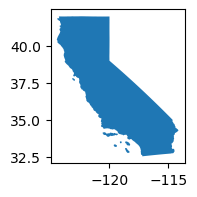

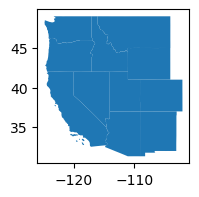

In [15]:
# example plot filtered for california
states[states['NAME'] == 'California'].plot(figsize=(2, 2))

# filters state if in state_names list resulting in states dataframe with only western states
west = states[states['STUSPS'].isin(state_names)]
print(west[west['STUSPS'] == 'CA'].geometry)

# plot the west
west.plot(figsize = (2, 2))

# view west geo file
west.head()

In [16]:
# map geometry info
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Write Functions to Return Geographical Labels From Latitude and Longitude
The geopandas and geometry packages use the US census data and the latitude/longitude point coordinates to determine if a coordinate is in the western states of interest and which state it is in. 

In [17]:
## functions to input coordinates and output location

# Function inputs geometry data for a region of interest (filtered above) and the coordinates
# returns T/F if point in region
def is_point_in(df, long, lat, region):
    region = region
    p1 = Point(map(float, (long, lat)))
    return any(df['geometry'].contains(p1))

# Test is_point_in function with coordinates in california
p1 = is_point_in(west, -117.6, 33.88, 'west')
print(f'I am in the west: {p1}')

# Function with same inputs that outputs the state the points are in rather than true/false
def state_in(df, long, lat):
    p1 = Point(map(float, (long, lat)))
    return df['STUSPS'].loc[df['geometry'].contains(p1)].values[0]

# Test with coordinates in california
print('Which state am I in?', state_in(west, -117.65, 33.8840))

I am in the west: True
Which state am I in? CA


#### Filter the Fires Dataset for the Coordinates in the Western States
A filtered dataset for coordinates known to be in California (but not inclusive for the whole state) was used to test the functions which are quite slow on the whole dataset.

In [18]:
# filter fires dataset for west

# start with rough filters guaranteed to cover the western US to reduce the data size
fire_filter = fire.loc[(fire['longitude'] > -125) & (fire['longitude'] < -100) & (fire['latitude'] > 30) & 
                (fire['latitude'] < 50)]
print('The dataset shape is now (rows, columns): ', fire_filter.shape)

# create a test dataframe on a filtered dataframe where the coordinates are guaranteed to be in california
# this does not include all of california
ca_check = fire.loc[(fire['latitude'] > 38) & (fire['latitude'] < 41) & (fire['longitude'] > -124) & (fire['longitude'] < -120)]
print('The test data shape is (rows, columns): ', ca_check.shape)

# check the functions on any point in the california slice dataframe
check = is_point_in(west, ca_check['longitude'].iloc[0], ca_check['latitude'].iloc[0], 'west')
check2 = state_in(west, ca_check['longitude'].iloc[0], ca_check['latitude'].iloc[0])

print('\ncheck functions on test dataset:', '\nis point in west?', check, '\nwhat state is point in?', check2)

The dataset shape is now (rows, columns):  (960500, 19)
The test data shape is (rows, columns):  (119130, 19)

check functions on test dataset: 
is point in west? True 
what state is point in? CA


In [19]:
### THIS CODE TAKES ABOUT 5 MINUTES TO RUN AND IS INTENDED AS A TEST FOR THE NEXT STEP ###
import swifter
# Add a column using the above functions to precisely determine if point is in west (True/False). Should all be True
ca_check['is_west'] = ca_check.swifter.apply(lambda x: is_point_in(west, x['longitude'], x['latitude'], 'west'), axis = 1)
ca_check.head()

Pandas Apply:   0%|          | 0/119130 [00:00<?, ?it/s]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day,daynight_num,is_west
105,39.5914,-122.1571,300.7,1.2,1.1,2001-01-03,1903,Terra,MODIS,41,6.2,286.5,6.0,D,0,2001,1,3,1,True
358,40.0888,-121.5852,300.9,1.7,1.3,2001-01-05,1850,Terra,MODIS,43,6.2,283.8,13.1,D,0,2001,1,5,1,True
359,39.0318,-122.3353,302.0,1.8,1.3,2001-01-05,1850,Terra,MODIS,50,6.2,287.9,12.6,D,0,2001,1,5,1,True
360,39.0299,-122.3138,311.2,1.8,1.3,2001-01-05,1850,Terra,MODIS,71,6.2,289.1,26.3,D,0,2001,1,5,1,True
477,39.5729,-121.1653,304.4,1.4,1.2,2001-01-06,1933,Terra,MODIS,59,6.2,281.9,13.6,D,0,2001,1,6,1,True


In [20]:
### THIS CODE TAKES ABOUT 5 MINUTES TO RUN AND IS INTENDED AS A TEST FOR THE NEXT STEP ###
# Add a column for which state a point is in. Should all be CA.
ca_check['state'] = ca_check.swifter.apply(lambda x: state_in(west, x['longitude'], x['latitude']), axis = 1)
ca_check.head()

Pandas Apply:   0%|          | 0/119130 [00:00<?, ?it/s]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,year,month,day,daynight_num,is_west,state
105,39.5914,-122.1571,300.7,1.2,1.1,2001-01-03,1903,Terra,MODIS,41,...,286.5,6.0,D,0,2001,1,3,1,True,CA
358,40.0888,-121.5852,300.9,1.7,1.3,2001-01-05,1850,Terra,MODIS,43,...,283.8,13.1,D,0,2001,1,5,1,True,CA
359,39.0318,-122.3353,302.0,1.8,1.3,2001-01-05,1850,Terra,MODIS,50,...,287.9,12.6,D,0,2001,1,5,1,True,CA
360,39.0299,-122.3138,311.2,1.8,1.3,2001-01-05,1850,Terra,MODIS,71,...,289.1,26.3,D,0,2001,1,5,1,True,CA
477,39.5729,-121.1653,304.4,1.4,1.2,2001-01-06,1933,Terra,MODIS,59,...,281.9,13.6,D,0,2001,1,6,1,True,CA


In [ ]:
### THIS CODE TAKES ~45 MIN TO RUN SO DON'T RUN IT UNLESS NEEDED ###

# Add a column using the above functions to precisely determine if point is in west (True/False)
fire_filter['is_west'] = fire_filter.swifter.apply(lambda x: is_point_in(west, x['longitude'], x['latitude'], 'west'), axis = 1)

Pandas Apply:   0%|          | 0/960500 [00:00<?, ?it/s]

In [ ]:
print('\nThe filtered data shape (rows, columns) is:', fire_filter.shape)
print('\nThe datatype for the new column is_west is:', type(fire_filter['is_west'].iloc[0]))
print('\nThe counts for the western states are:\n', fire_filter['is_west'].value_counts())

# Filter the dataframe for the True values in the is_west column
fire_west = fire_filter.loc[fire_filter.is_west]

print('\nThe filtered data shape is:', fire_west.shape)
fire_west.head()

In [ ]:
### THIS CODE TAKES ~45 MIN TO RUN SO DON'T RUN IT UNLESS NEEDED ###

# The dataset must already be filtered for the western states for this code to work
# Add a column to identify which state the coordinates are in from the west geo file. 
fire_west['state'] = fire_west.swifter.apply(lambda x: state_in(west, x['longitude'], x['latitude']), axis = 1)

print('\nThe counts for each western states are:\n', fire_west['state'].value_counts())
fire_west.head()

#### Select final columns and write to csv files

In [ ]:
air_quality_data = aq_west_m[['year', 'month', 'day', 'state', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'Daily Mean PM2.5 Concentration',
                                    'DAILY_AQI_VALUE', 'PERCENT_COMPLETE']]
# preview the air quality data
air_quality_data.head()

In [ ]:
fire_data = fire_west[['year', 'month', 'day', 'acq_time', 'latitude', 'longitude', 'brightness', 'frp', 'daynight', 'confidence', 'daynight_num', 'state']]

# preview the fire data
fire_data.head()

In [ ]:
# Write to csv and read in for next portion of the analysis.
fire_data.to_csv('fire_data_cleaned.csv', index = False)
air_quality_data.to_csv('air_quality_data_cleaned.csv', index = False)

### Part 2. Data Quality Assessment

#### Air Quality Data

In [ ]:
# Read each CSV file into DataFrame

# Run this line if it is a zipped file
#air_quality_cleaned = pd.read_csv('air_quality_data_cleaned/air_quality_data_cleaned.csv')

# Run this line if it is a csv
air_quality_cleaned = pd.read_csv('air_quality_data_cleaned.csv')

air_quality_cleaned.head()

In [ ]:
# Sorted date by ascending order
air_quality_cleaned = air_quality_cleaned.sort_values(['year', 'month', 'day'], ascending = True)
air_quality_cleaned.head(10)

In [ ]:
# Data type for each column
air_quality_cleaned.dtypes

In [ ]:
# Check to see if DataFrame has missing values (NaN)
missing = air_quality_cleaned.isna().sum()
print(missing)

In [ ]:
# Check size of dataframe
air_quality_cleaned.shape

In [ ]:
# Check for duplicate records
duplicate_records = air_quality_cleaned[air_quality_cleaned.duplicated()]

print(duplicate_records['state'].value_counts())
duplicate_records

print(duplicate_records['year'].value_counts())
duplicate_records

Duplicate records are present in the cleaned dataset. A separate investigation determined that one of the removed columns, 'POC', was causing duplicate records after removal because sites have multiple sensors that are measuring the same pollutant and these are assigned unique 'POC' values. It was decided to remove the duplicates in the cleaned dataset so that we have one unique record per site and measurement time. 

In [ ]:
# Drop the duplicate records
air_quality_cleaned = air_quality_cleaned.drop_duplicates()
print('The number of dropped rows is: ', (2403146 - air_quality_cleaned.shape[0]))

In [ ]:
# Generate summary statistics
# The mean is sensitive to outliers
# The fact the mean is so small compared to the max value indicates the max value is an outlier.
air_quality_cleaned.describe()

In [ ]:
# Box Plot of attributes to visualize outliers

sns.boxplot(data=air_quality_cleaned[['SITE_LATITUDE','SITE_LONGITUDE','Daily Mean PM2.5 Concentration',
                                      'DAILY_AQI_VALUE','PERCENT_COMPLETE']], orient="h")

There are outliers in the daily AQI value, however there is a continuous tail of outliers on the high end of the index. This indicates that the data is not normally distributed and the quantity of outliers suggests that they are not an artifact but a true charactaristic of the data. Therefore, we will not remove outliers but be aware of this shape going into any analysis step that assumes normality. 

In [ ]:
# Inter Quartile Range approach to finding the outliers
# create a function to find outliers using IQR
# https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers(air_quality_cleaned):
   q1 = air_quality_cleaned.quantile(0.25)
   q3 = air_quality_cleaned.quantile(0.75)
   IQR = q3 - q1

   outliers = air_quality_cleaned[((air_quality_cleaned<(q1-1.5*IQR)) | (air_quality_cleaned>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers(air_quality_cleaned['Daily Mean PM2.5 Concentration'])

print('Number of outliers: ' + str(len(outliers)))
print()
print('Outlier max value: ' + str(outliers.max()))
print()
print('Outlier min value: ' + str(outliers.min()))
print()
outliers

In [ ]:
outliers = find_outliers(air_quality_cleaned['DAILY_AQI_VALUE'])

print('Number of outliers: ' + str(len(outliers)))
print()
print('Outlier max value: ' + str(outliers.max()))
print()
print('Outlier min value: ' + str(outliers.min()))
print()
outliers

#### Fire Data

In [ ]:
# Read each CSV file into DataFrame
#fire_data_cleaned = pd.read_csv('fire_data_cleaned/fire_data_cleaned.csv')

fire_data_cleaned = pd.read_csv('fire_data_cleaned.csv')

fire_data_cleaned.head()

In [ ]:
# Sorted date by ascending order
fire_data_cleaned = fire_data_cleaned.sort_values(['year', 'month', 'day'], ascending = True)
fire_data_cleaned.head(10)

In [ ]:
# Data type for each column
fire_data_cleaned.dtypes

In [ ]:
# Check to see if DataFrame has missing values (NaN)
missing = fire_data_cleaned.isna().sum()
print(missing)

In [ ]:
# Check size of dataframe
fire_data_cleaned.shape

In [ ]:
# Check for duplicate records
duplicate_records = fire_data_cleaned[fire_data_cleaned.duplicated()]
duplicate_records

In [ ]:
# Generate summary statistics
# The mean is sensitive to outliers
# The fact the mean is so small compared to the max value indicates the max value is an outlier.
fire_data_cleaned.describe()

In [ ]:
# Box Plot of attributes to visualize outliers
sns.boxplot(data=fire_data_cleaned[['acq_time','latitude','longitude','brightness','frp','confidence','daynight_num']], 
            orient="h")

There are outliers in the fire radiative power, however there is a continuous tail of outliers on the high end of the values. This indicates that the data is not normally distributed and the quantity of outliers suggests that they are not an artifact but a true charactaristic of the data. Therefore, we will not remove outliers but be aware of this shape going into any analysis step that assumes normality. 

In [ ]:
# Inter Quartile Range approach to finding the outliers
# create a function to find outliers using IQR
# https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers(fire_data_cleaned):
   q1 = fire_data_cleaned.quantile(0.25)
   q3 = fire_data_cleaned.quantile(0.75)
   IQR = q3 - q1

   fire_outliers = fire_data_cleaned[((fire_data_cleaned<(q1-1.5*IQR)) | (fire_data_cleaned>(q3+1.5*IQR)))]

   return fire_outliers

In [ ]:
fire_outliers = find_outliers(fire_data_cleaned['frp'])

print('Number of outliers: ' + str(len(fire_outliers)))
print()
print('Outlier max value: ' + str(fire_outliers.max()))
print()
print('Outlier min value: ' + str(fire_outliers.min()))
print()
fire_outliers

In [ ]:
# drop the measurement time since we don't need to track within a day for our analyis
# drop daynight since we coded it as binary
fire_data_cleaned = fire_data_cleaned.drop(['acq_time', 'daynight'], axis = 1)
fire_data_cleaned.head()

In [ ]:
# drop percent complete since every value is 100%, it doesn't add any information to our data
air_quality_cleaned = air_quality_cleaned.drop(['PERCENT_COMPLETE'], axis = 1)
air_quality_cleaned.head()

In [ ]:
# add datetime column from the three string columns
def date_col(dataframe):
    date = []
    for index in range(len(dataframe)):
        date_index = []
        year = str(dataframe.year[index])
        month = str(dataframe.month[index])
        day = str(dataframe.day[index])
        if len(month) == 1:
            if len(day) == 1:
                date_index = [year, '0' + month, '0' + day]
            else:
                date_index = [year, '0' + month, day]
        else:
            if len(day) == 1:
                date_index = [year, month, '0' + day]
            else:
                date_index = [year, month, day]
        date += ['-'.join(date_index)]
    dataframe['date'] = date
    return dataframe
fire_data = date_col(fire_data)
air_quality_data = date_col(air_quality_data)

#### Write Modified Dataframes to CSV FIles

In [ ]:
## overwrite the csv files written at the end of the data processsing section.
## with any additional modifications from the data quality assessment. E.G., removed duplicates

# Write to csv and read in for next portion of the analysis.
fire_data.to_csv('fire_data_cleaned.csv', index = False)
air_quality_data.to_csv('air_quality_data_cleaned.csv', index = False)

### Part 3. Data Exploration

Some basic plots for fire data by latitude and longitude are plotted to gain a basic understanding for how the data is spatially distributed before going into an analysis. 

In [ ]:
# Plot all fire data by latitude and longitude. 
# Color by year on a continuous color scale to visually separate distinct fires over time. 
# A high transparency and small point size help visualize the density differences in certain areas. 
plt.scatter(x = fire_west['longitude'], y = fire_west['latitude'], 
            alpha = 0.2, s = 1, c = fire_west['year'], cmap = 'rainbow')
plt.colorbar()
plt.show()

In [ ]:
# Plot the fire data divided into smaller time intervals
fire1 = fire_west.loc[fire_west['year'] >= 2017]
fire2 = fire_west.loc[(fire_west['year'] >= 2012) & (fire_west['year'] < 2017)]
fire3 = fire_west.loc[(fire_west['year'] >= 2007) & (fire_west['year'] < 2012)]
fire4 = fire_west.loc[fire_west['year'] < 2007]

# Use an even smaller alpha and point size with a single color.
plt.figure(figsize = (3, 3))
plt.scatter(x = fire4['longitude'], y = fire4['latitude'], 
            alpha = .01, s = .1, c = 'red')
plt.title('2001 to 2006 Fires')

plt.figure(figsize = (3, 3))
plt.scatter(x = fire3['longitude'], y = fire3['latitude'], 
            alpha = .01, s = .1, c = 'red')
plt.title('2007 to 2011 Fires')

plt.figure(figsize = (3, 3))
plt.scatter(x = fire2['longitude'], y = fire2['latitude'], 
            alpha = .01, s = .1, c = 'red')
plt.title('2012 to 2016 Fires')

plt.figure(figsize = (3, 3))
plt.scatter(x = fire1['longitude'], y = fire1['latitude'], 
            alpha = .01, s = .1, c = 'red')
plt.title('2017 to 2021 Fires')

One pattern that stands out is the increase in fire density, especially in California and the west coast, in the most recent time interval. 

In [ ]:
# Isolate fires from a single year, 2020. Visualize the time component with color by month. 
fire5 = fire_west.loc[fire_west['year'] == 2020]

plt.figure(figsize = (8, 6))
plt.scatter(x = fire5['longitude'], y = fire5['latitude'], 
            alpha = .7, s = .4, c = fire5['month'], cmap = 'plasma')
plt.colorbar()
plt.title('2020 Fires Colored by Month')

Distinct fires are visually distinguishable even in small spatial areas by color differences. This is some indication that unsupervised clustering may help us to label distinct fires by inputting space and time attributes. 

In [ ]:
# Get distinct latitude and longitude coordinates from the air quallty data. 
# Which should represent unique air quality monitor locations. 
aq5 = aq_west[['SITE_LATITUDE', 'SITE_LONGITUDE']].drop_duplicates()

plt.figure(figsize = (8, 6))
plt.scatter(x = aq5['SITE_LONGITUDE'], y = aq5['SITE_LATITUDE'], 
            alpha = .8, s = 1, c = 'black')
plt.title('Unique Air Quality Sensors')

In [ ]:
fire_data = pd.read_csv('fire_data_cleaned.csv')
print(fire_data.dtypes)
fire_data.head()

In [ ]:
air_quality_data = pd.read_csv('air_quality_data_cleaned.csv')
air_quality_data.head()

In [ ]:
# Calculating the correlation matrix for the fire data
fire_data_corr = fire_data.corr()
fire_data_corr

In [ ]:
# Scatter plot matrix of fire data
sns.pairplot(fire_data, diag_kind = 'kde')

In [ ]:
# Histograms of interest in from the scatter plot matrix
fig, ax = plt.subplots(1,3, sharey = True)

ax[0].hist(fire_data.brightness)
ax[0].set_xlabel('Brightness')

ax[1].hist(fire_data.frp, bins = 500)
ax[1].set_xlabel('Fire Radiative Power')
ax[1].set_xlim([0,1000])

ax[2].hist(fire_data.confidence)
ax[2].set_xlabel('Confidence')

The code above calculates the correlation matrix, graphs the scatterplot matrix, and shows histograms of interest from the scatterplot matrix.

From the correlation matrix and the scatter plot matrix, we can see that there are high correlations between the brightness and frp variables (0.66) and the brightness and confidence variables (0.58). On the scatterplot matrix, it can be seen that neither of these relationships are linear. This is probably because as the temperature of the fire increases, the fire generates more heat and the MODIS sensor picks it up more easily.

As for the histograms, we can see that all of the distributions for these attributes are skewed, especially for the fire radiative power (FRP). To show the distribution for the FRP, a large amount of bins were required and the x-axis had to be limited. This corroborates our findings for the large amount of outliers found in data for the FRP attribute.

In [ ]:
air_quality_data_corr = air_quality_data.corr()
air_quality_data_corr

In [ ]:
# Scatter matrix of air quality data
sns.pairplot(air_quality_data, diag_kind = 'kde')

The code above calculates the correlation matrix and scatterplot matrix for the air quality data.

From both matrices, we can see that there is a very high correlation between the Daily PM2.5 Concentration and Daily AQI Value. This makes sense because one of the variables that determines the AQI value is the Daily PM2.5 matrix. Also, from the center plots of both AQI and PM2.5 Concentration, we see a similar skewness to FRP.

In [ ]:
# Splitting data to avoid crash
fire_data_2001_2010_mask = fire_data['year'] <= 2010
fire_data_2001_2010 = fire_data.loc[fire_data_2001_2010_mask]
fire_data_2011_2021_mask = fire_data['year'] > 2010
fire_data_2011_2021 = fire_data.loc[fire_data_2011_2021_mask]

air_quality_data_2001_2010_mask = air_quality_data['year'] <= 2010
air_quality_data_2001_2010 = air_quality_data.loc[air_quality_data_2001_2010_mask]
air_quality_data_2011_2021_mask = air_quality_data['year'] > 2010
air_quality_data_2011_2021 = air_quality_data.loc[air_quality_data_2011_2021_mask]

# Averaging air quality data by year, month, and day
air_quality_year_2001_2010 = air_quality_data_2001_2010.groupby('year', as_index = False)
air_quality_year_avg_2001_2010 = air_quality_year_2001_2010.mean()
air_quality_month_2001_2010 = air_quality_data_2001_2010.groupby(['year', 'month'],as_index = False)
air_quality_month_avg_2001_2010 = air_quality_month_2001_2010.mean()
air_quality_day_2001_2010 = air_quality_data_2001_2010.groupby(['year', 'month', 'day'], as_index = False)
air_quality_day_avg_2001_2010 = air_quality_day_2001_2010.mean()

air_quality_year_2011_2021 = air_quality_data_2011_2021.groupby('year', as_index = False)
air_quality_year_avg_2011_2021 = air_quality_year_2011_2021.mean()
air_quality_month_2011_2021 = air_quality_data_2011_2021.groupby(['year', 'month'], as_index = False)
air_quality_month_avg_2011_2021 = air_quality_month_2011_2021.mean()
air_quality_day_2011_2021 = air_quality_data_2011_2021.groupby(['year', 'month', 'day'], as_index = False)
air_quality_day_avg_2011_2021 = air_quality_day_2011_2021.mean()

# Averaging fire data by year, month, and day
fire_year_2001_2010 = fire_data_2001_2010.groupby('year', as_index = False)
fire_year_avg_2001_2010 = fire_year_2001_2010.mean()
fire_month_2001_2010 = fire_data_2001_2010.groupby(['year', 'month'],as_index = False)
fire_month_avg_2001_2010 = fire_month_2001_2010.mean()
fire_day_2001_2010 = fire_data_2001_2010.groupby(['year', 'month', 'day'], as_index = False)
fire_day_avg_2001_2010 = fire_day_2001_2010.mean()

fire_year_2011_2021 = fire_data_2011_2021.groupby('year', as_index = False)
fire_year_avg_2011_2021 = fire_year_2011_2021.mean()
fire_month_2011_2021 = fire_data_2011_2021.groupby(['year', 'month'], as_index = False)
fire_month_avg_2011_2021 = fire_month_2011_2021.mean()
fire_day_2011_2021 = fire_data_2011_2021.groupby(['year', 'month', 'day'], as_index = False)
fire_day_avg_2011_2021 = fire_day_2011_2021.mean()

In [ ]:
# Disabling data limit
alt.data_transformers.disable_max_rows()

# Creating sliders for month and year
month_slider = alt.binding_range(min=1, max=12, step=1, name='Month')
month_selection = alt.selection_point(value = 1, fields = ['month'], bind=month_slider)
year_slider = alt.binding_range(min=2001, max=2010, step=1, name='Year')
year_selection = alt.selection_point(value = 2001, fields = ['year'], bind=year_slider)

# Graphs for AQI over time
AQI_day_line = alt.Chart(air_quality_day_avg_2001_2010, width = 270).mark_line().encode(
    alt.X('day:Q').scale(domain = (1,31)),
    alt.Y('DAILY_AQI_VALUE:Q').scale(domain = (10, 88)).title('Daily AQI Value')
).add_params(month_selection, year_selection).transform_filter(year_selection & month_selection)

AQI_month_line = alt.Chart(air_quality_month_avg_2001_2010, width = 270, title = 'Air Quality Index over Time').mark_line().encode(
    alt.X('month:Q').scale(zero = False),
    alt.Y('DAILY_AQI_VALUE:Q').scale(domain = (10, 88)).axis(None)
).add_params(year_selection).transform_filter(year_selection)

AQI_year_line = alt.Chart(air_quality_year_avg_2001_2010, width = 270).mark_line().encode(
    alt.X('year:Q').scale(zero = False),
    alt.Y('DAILY_AQI_VALUE:Q').scale(domain = (10, 88)).axis(None)
)

# Graphs for frp over time
frp_day_line = alt.Chart(fire_day_avg_2001_2010, width = 270).mark_line(clip = True).encode(
    alt.X('day:Q').scale(domain = (1,31)),
    alt.Y('frp').scale(domain = (0,300)).title('Fire Radiative Power (Watts)')
).add_params(month_selection, year_selection).transform_filter(year_selection & month_selection)
# There is an outlier in month 9 with a value of 987 Watts

frp_month_line = alt.Chart(fire_month_avg_2001_2010, width = 270, title = 'Fire Radiative Power over Time').mark_line().encode(
    alt.X('month:Q').scale(zero = False),
    alt.Y('frp').scale(domain = (0,300)).axis(None),
).add_params(year_selection).transform_filter(year_selection)

frp_year_line = alt.Chart(fire_year_avg_2001_2010, width = 270).mark_line().encode(
    alt.X('year:Q').scale(zero = False),
    alt.Y('frp').scale(domain = (0,300)).axis(None)
)

# Graphs for brightness over time
brightness_day_line = alt.Chart(fire_day_avg_2001_2010, width = 270).mark_line().encode(
    alt.X('day:Q').scale(domain = (1,31)),
    alt.Y('brightness').scale(domain = (300, 375)).title('Brightness (Kelvin)'),
).add_params(month_selection, year_selection).transform_filter(year_selection & month_selection)

brightness_month_line = alt.Chart(fire_month_avg_2001_2010, width = 270, title = 'Brightness over Time').mark_line().encode(
    alt.X('month:Q').scale(zero = False),
    alt.Y('brightness').scale(domain = (300, 375)).axis(None)
).add_params(year_selection).transform_filter(year_selection)

brightness_year_line = alt.Chart(fire_year_avg_2001_2010, width = 270).mark_line().encode(
    alt.X('year:Q').scale(zero = False),
    alt.Y('brightness').scale(domain = (300, 375)).axis(None)
)

(AQI_day_line | AQI_month_line | AQI_year_line) & (frp_day_line | frp_month_line | frp_year_line) & (brightness_day_line | brightness_month_line | brightness_year_line)

The code above plots the Daily AQI Value, the FRP, and the fire brightness over time for 2001 to 2010. It also includes choosing what month and year the data was collected. This will be used to identify trends over time.

Below is an image of what the plot would look like:

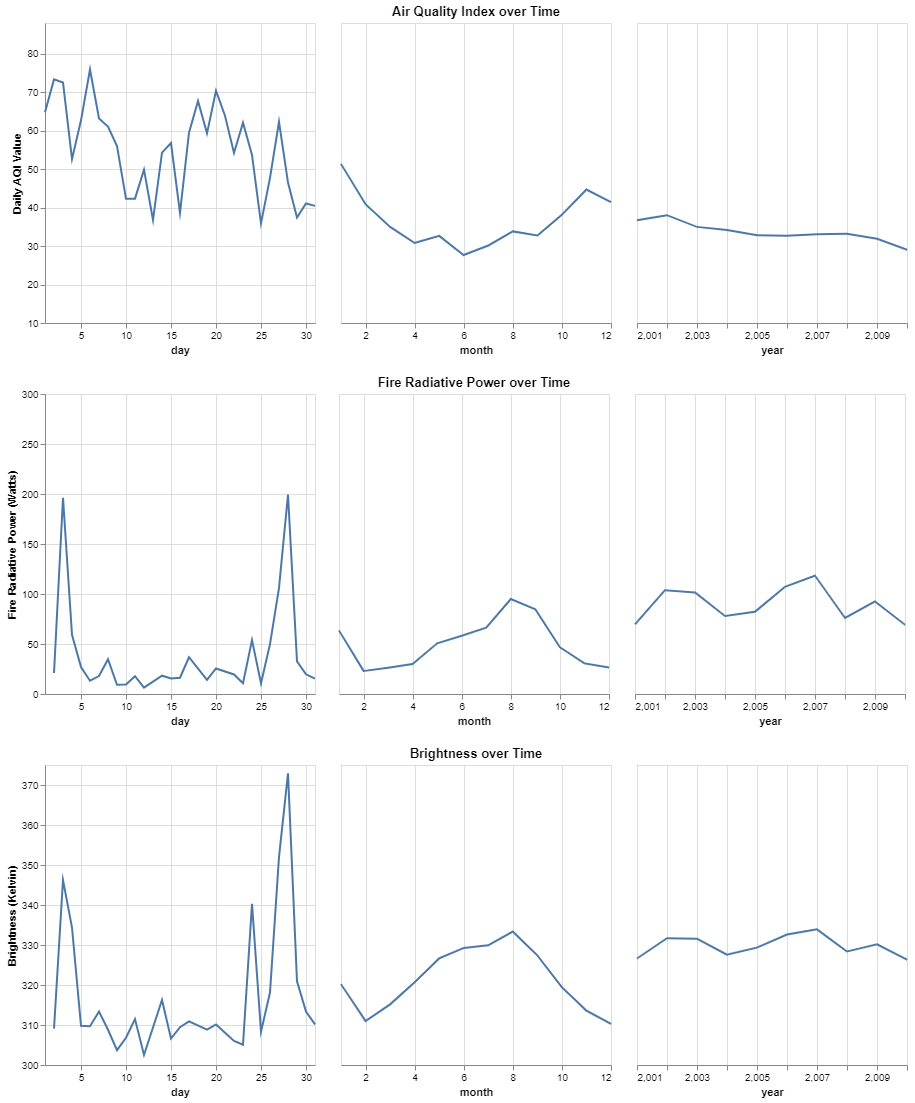

In [ ]:
# Disabling data limit
alt.data_transformers.disable_max_rows()

# Creating sliders for month and year
month_slider = alt.binding_range(min=1, max=12, step=1, name='Month')
month_selection = alt.selection_point(value = 1, fields = ['month'], bind=month_slider)
year_slider = alt.binding_range(min=2011, max=2021, step=1, name='Year')
year_selection = alt.selection_point(value = 2011, fields = ['year'], bind=year_slider)

# Graphs for AQI over time
AQI_day_line = alt.Chart(air_quality_day_avg_2011_2021, width = 270).mark_line().encode(
    alt.X('day:Q').scale(domain = (1,31)),
    alt.Y('DAILY_AQI_VALUE:Q').scale(domain = (10, 88)).title('Daily AQI Value')
).add_params(month_selection, year_selection).transform_filter(year_selection & month_selection)

AQI_month_line = alt.Chart(air_quality_month_avg_2011_2021, width = 270, title = 'Air Quality Index over Time').mark_line().encode(
    alt.X('month:Q').scale(zero = False),
    alt.Y('DAILY_AQI_VALUE:Q').scale(domain = (10, 88)).axis(None)
).add_params(year_selection).transform_filter(year_selection)

AQI_year_line = alt.Chart(air_quality_year_avg_2011_2021, width = 270).mark_line().encode(
    alt.X('year:Q').scale(zero = False),
    alt.Y('DAILY_AQI_VALUE:Q').scale(domain = (10, 88)).axis(None)
)

# Graphs for frp over time
frp_day_line = alt.Chart(fire_day_avg_2011_2021, width = 270).mark_line(clip = True).encode(
    alt.X('day:Q').scale(domain = (1,31)),
    alt.Y('frp').scale(domain = (0,500)).title('Fire Radiative Power (Watts)')
).add_params(month_selection, year_selection).transform_filter(year_selection & month_selection)
# There is an outlier in month 9 with a value of 987 Watts

frp_month_line = alt.Chart(fire_month_avg_2011_2021, width = 270, title = 'Fire Radiative Power over Time').mark_line().encode(
    alt.X('month:Q').scale(zero = False),
    alt.Y('frp').scale(domain = (0,500)).axis(None),
).add_params(year_selection).transform_filter(year_selection)

frp_year_line = alt.Chart(fire_year_avg_2011_2021, width = 270).mark_line().encode(
    alt.X('year:Q').scale(zero = False),
    alt.Y('frp').scale(domain = (0,500)).axis(None)
)

# Graphs for brightness over time
brightness_day_line = alt.Chart(fire_day_avg_2011_2021, width = 270).mark_line().encode(
    alt.X('day:Q').scale(domain = (1,31)),
    alt.Y('brightness').scale(domain = (300, 375)).title('Brightness (Kelvin)'),
).add_params(month_selection, year_selection).transform_filter(year_selection & month_selection)

brightness_month_line = alt.Chart(fire_month_avg_2011_2021, width = 270, title = 'Brightness over Time').mark_line().encode(
    alt.X('month:Q').scale(zero = False),
    alt.Y('brightness').scale(domain = (300, 375)).axis(None)
).add_params(year_selection).transform_filter(year_selection)

brightness_year_line = alt.Chart(fire_year_avg_2011_2021, width = 270).mark_line().encode(
    alt.X('year:Q').scale(zero = False),
    alt.Y('brightness').scale(domain = (300, 375)).axis(None)
)



(AQI_day_line | AQI_month_line | AQI_year_line) & (frp_day_line | frp_month_line | frp_year_line) & (brightness_day_line | brightness_month_line | brightness_year_line)

The code above plots the Daily AQI Value, the FRP, and the fire brightness over time for 2011 to 2021. It also includes choosing what month and year the data was collected. This will be used to identify trends over time.

Below is an image of what the plot would look like:

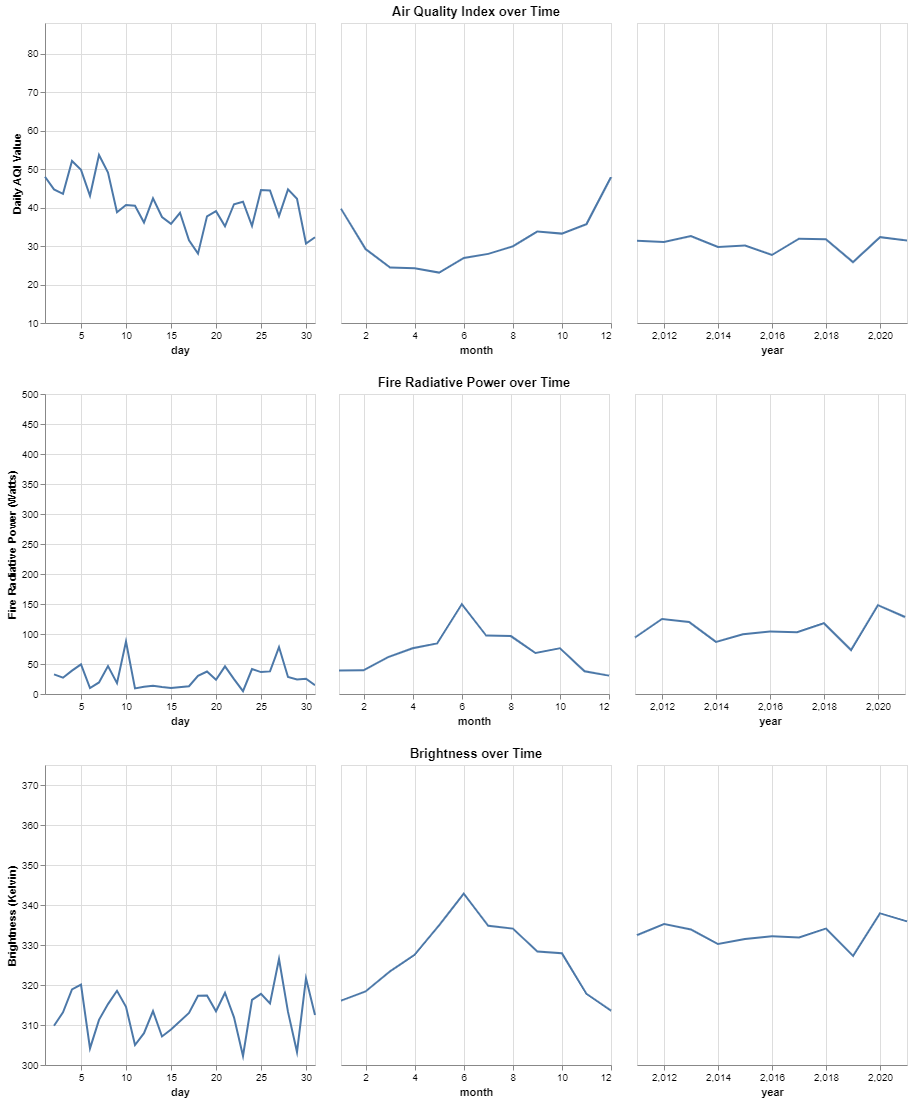

### Part 4. Analysis Approach
***
**1. Clustering** <br>
In order to identify distinct fires over space and time, different clustering algorithms will be performed to assign labels to individual fires. Different methods, such as DBScan and Kmeans, will be assessed to get the best clustering possible. Once a clustering analysis can isolate single fires, the size, duration, average brightness, and radiative power can be determined and used as attributes for further analysis. Additionally, the nearest air quality sensor for each fires can be identified. The output of this analysis will be a dataframe with the newly defined attributes that can be used in subsequent steps. 

**2. Time series:** <br>
Time series will be evaluated to investigate the trends of fires and air quality over time. Aggregate data attributes with a moving average will be plotted and used to predict future trends. Seasonal trends can also be identified with time series plots. 

**3. Fire categorization:** <br>
Clustering analysis to categorize fires by attributes and assign risk factors to different areas based on size of area affected, duration, and intensity of fire. Risk assessment would involve this fire category assignment and frequency over time by location. The location assignments will be determined by air quality sensors. The risk factors associated with fires can be further categorized by air quality index spikes.

**4. Air Quality Prediction:** <br>
Predicting local air quality spikes associated with an individual fire. Group data by fire instance and evaluating nearby air quality monitors for changes in baseline. Hypothesis testing will be used to determine statistical significance. 

**5. GUI:** <br>
Creating a visual application that would utilize our findings findings from the analysis stated above. For example, one could enter in certain fire attributes and it would return the fire categorization. Additionally, if the location of said fire was entered, it would predict the fire risk factor and the potential air quality strike. We could possibly test these predictions against the data on the website: riskfactor.com.

## Peer Feedback
***

We were given feedback by Dr. Anna Little and Arpit Patil.
#### Issues Discussed:
    
**1. Categorizing fires and potentially predicting fire type.** <br>
    We plan on potentially using this idea for our final analysis. This would mean that we would have to identify categories from the fire data attributes such as size, duration, and intensity.
    
    
**2. Grouping fire data and air quality by location.** <br>
    We plan on potentially grouping the fire data by state or by air quality site. This may involved some kind of clustering that could isolate distinct fires from each other by location and time. The locations for the air quality are already grouped by site and state so we would not have to address this issue.
    
    
**3. Using fire data to predict air quality.** <br>
    We noted that there should be an effect on air quality due to wild fires, and we plan to explore that and potentially create a moving average rather than completely predicting the air quality. However, we also realized that there are other factors that play into prediction air quality. These factors include weather and wind patterns, geographical locations, and carbon emissions.
   
   
**4. Looking at fire data over time and determining fire risk score by location.** <br>
    This suggestion was also a good idea to use for our final analysis. Furthermore, this would require looking for geographical fire patterns over time. We plan on looking at fire data from 2001 to 2021.
    
    
**5. What do the data attributes really mean?** <br>
    We realized that we don't know exactly how to interpret some of the fire variables. Thus, we plan to do some research into their meaning and how they are measured.


**6. How are we determining the area of a fire and distinguishing different fires?** <br>
    We plan to identify a single fire using a group of data points with similar time frames and latitude and longitude points. Then we'll try to map it with using color to show how the fire changes over time.


#### Feedback Quality: 
The feedback was really helpful and constructive. They helped us recognize that some of our expectations for further analysis would not be possible or hard to accomplish. They also gave us some new ideas for further analysis and helped us identify points in our project that were lacking.

## Project Schedule and Milestones
***
### Project Proposal Due March 17th
>**March 12th** <br>
**Project Proposal Plan:** Group meeting to discuss project objectives and begin populating the proposal template. Divide up follow up tasks.
> - [x] Isabelle: polish background and motivation <br>
> - [x] Jenine: polish ethical considerations <br>
> - [x] Hannah: polish data section <br>
> - [x] Everyone: review data processing, exploration, and analysis sections <br>

>**March 16th** <br>
**Proposal Submission:** Group meeting to review and finalize proposal document in Jupyter Notebook, set up Github repository
> - [x] Everyone: review and make final edits <br>

### 1st Project Milestone Submission Due April 4th
>**March 21st** <br>
**Finalize dataset:** Group meeting to establish specific data cleaning and exploratory analysis tasks. Divide amongst team.
> - [x] Isabelle: Download all data files and upload to github by Wednesday 3/21 <br>
> - [x] Jenine: Write code to load in all data files in jupyter notebook and get notebook on github by Friday 3/24 <br>
> - [x] Hannah: Merge data (and parse date columns - not complete yet), filter for states of interest by coordinates 03/30 <br>
> - [x] Isabelle: Remove columns not needed, assign numerical values to categorical values 3/27 <br>
> - [x] Everyone: General exploratory tasks <br>

>**March 28th** <br>
**Data Cleaning and Exploratory Work:** Group meeting to review data cleaning and exploratory work. Identify further exploratory tasks and divide amongst team.
> - [x] Isabelle: Plot over time fire and air quality attributes. Correlation matrices for each dataset. Look at what the values mean. Write up peer feedback.  <br> 
> - [x] Jenine: Check missing values, duplicate records, outliers, descriptive statistics for each attribute 3/28 <br> 
> - [x] Hannah: geographical plots for a few years with AQ and Fire data. Ideas for grouping and merging. Picking out individual fires and looking at how they change over time. <br>
> - [x] Everyone: Additional exploratory work. Review all others work. <br>

>**April 3rd** <br>
**Review Work for Milestone:** Group meeting to review and discuss completed work. Establish a more detailed analysis and visualization plan. Assign tasks. Compile document for milestone submission. 
> - [x] Isabelle: Check file downloads for duplicate records <br>
> - [x] Jenine: Look further into duplicates <br>
> - [x] Hannah: Compile jupyter notebook into milestone document <br>

>**April 4th** <br>
**Finalize Milestone and Analysis Plan:** Group meeting to finalize milestone document and outline a more detailed analysis plan and assign next tasks.
> - [ ] Isabelle: Start on GUI <br>
> - [ ] Jenine: Start on time series <br>
> - [ ] Hannah: Start on clustering <br>

### Final Submission Due April 21st
>**April 11th** <br>
**Initial Analysis and Visualizations:** Group meeting to review initial analysis steps and visualization. Aim to have a draft or starting point for every analysis task planned. Establish action items and divide tasks amongst team.
> - [ ] Isabelle: <br>
> - [ ] Jenine: <br>
> - [ ] Hannah: <br>
> - [ ] Everyone: <br>

>**April 18th** <br>
**Final Analysis and Documentation:** Group meeting to review final analysis and documentation. Have analysis and visualizations mostly complete. Review and make final adjustments. Identify any final action items.
> - [ ] Isabelle: <br>
> - [ ] Jenine: <br>
> - [ ] Hannah: <br>
> - [ ] Everyone: <br>

>**April 20th** <br>
**Finalize Submission:** Group meeting to review final submission and make any final edits. Record video presentation. Compile finalized documents.
> - [ ] Isabelle: <br>
> - [ ] Jenine: <br>
> - [ ] Hannah: <br>
> - [ ] Everyone: <br>

## Project Deviations and Updated Milestones
***

- We decided to not use air quality measurements for several different pollutants. We made this choice because it would have taken us several hours to collect the data using the method given on the website the air quality was taken from. Furthermore, we decided that the data from just one pollutant was enough to use for this project.

- After the peer feedback, we realised that trying to predict the location of a fire would be impossible to do accurately. Thus, we changed out focus to categorizing the fires rather than predicting their location.

- When we tried to merge the air quality and fire data sets, we realized that their values did not match up which resulted in a large amount of NaN in our data set. Therefore, we realized that his will require more extensive analysis to accurately merge the data and decided that this step will come later in the project.


## Project Summary
***
The project is on track with our project plan outlined in the proposal. The dataset has been fully defined, the data processing and exploration is complete, and we have outlined a plan for our next analysis steps. With the peer feedback and by working through the first stage of the project, we have identified areas that are more challenging than we anticipated and have adapted our plan in order to accomplish these tasks in a more realistic manner. The biggest challenge we face in the next stage of the project is aggregating the fire data in order to get attributes for distinct fires. The rest of the analysis depends on this step, and it is therefore our highest priority to figure out the best method for this step. We are excited for the analysis phase of the project so we can begin to understand the relationships in the data and how they can be used to inform the risk of fire and air quality to public health. In the process, we will deepen our understanding of several techniques learned in the course, and apply them to a practical research question. 